In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'/home/aw1223/ip/agile/imports/neural-lam')
sys.path.insert(0,'/home/aw1223/ip/agile/imports/neural-lam/neural_lam')

sys.path.insert(0,'/home/aw1223/ip/agile')


import torch


from neural_lam.models.graph_lam import GraphLAM
from neural_lam.weather_dataset import WeatherDataset
from neural_lam.utils import make_mlp
from neural_lam.interaction_net import InteractionNet

from sdk.ample import Ample


import argparse
# Manually create the args Namespace object with the desired parameters
args = argparse.Namespace(
    dataset='meps_example',
    model='graph_lam',
    subset_ds=True,
    seed=42,
    n_workers=1,
    epochs=1,
    batch_size=1,
    load=None,
    restore_opt=0,
    precision=32,
    graph='1level',
    hidden_dim=64,
    hidden_layers=1,
    processor_layers=1,
    mesh_aggr='sum',
    output_std=0,
    ar_steps=1,
    loss='wmse',
    step_length=1,
    lr=0.001,
    val_interval=1,
    split='val',
    n_example_pred=1
)
print('Neural LAM Args', args)
#Change to neural-lam directory
%cd /home/aw1223/ip/worktree_a/imports/neural-lam

eval_loader = torch.utils.data.DataLoader(
                WeatherDataset(
                    args.dataset,
                    pred_length=1,
                    split=args.split,
                    subsample_step=1,
                    subset=bool(args.subset_ds),
                ),
                args.batch_size,
                shuffle=False,
                num_workers=args.n_workers,
            )


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/aw1223/anaconda3/envs/ample/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Neural LAM Args Namespace(dataset='meps_example', model='graph_lam', subset_ds=True, seed=42, n_workers=1, epochs=1, batch_size=1, load=None, restore_opt=0, precision=32, graph='1level', hidden_dim=64, hidden_layers=1, processor_layers=1, mesh_aggr='sum', output_std=0, ar_steps=1, loss='wmse', step_length=1, lr=0.001, val_interval=1, split='val', n_example_pred=1)
/home/aw1223/ip/worktree_a/imports/neural-lam


In [2]:
ample = Ample()
model = GraphLAM(args)

Loaded graph with 70345 nodes (63784 grid, 6561 mesh)
Edges in subgraphs: m2m=51520, g2m=100656, m2g=255136


Moving model to Ample
Compiling model
grid_features torch.Size([63784, 54])
Rendering graph...


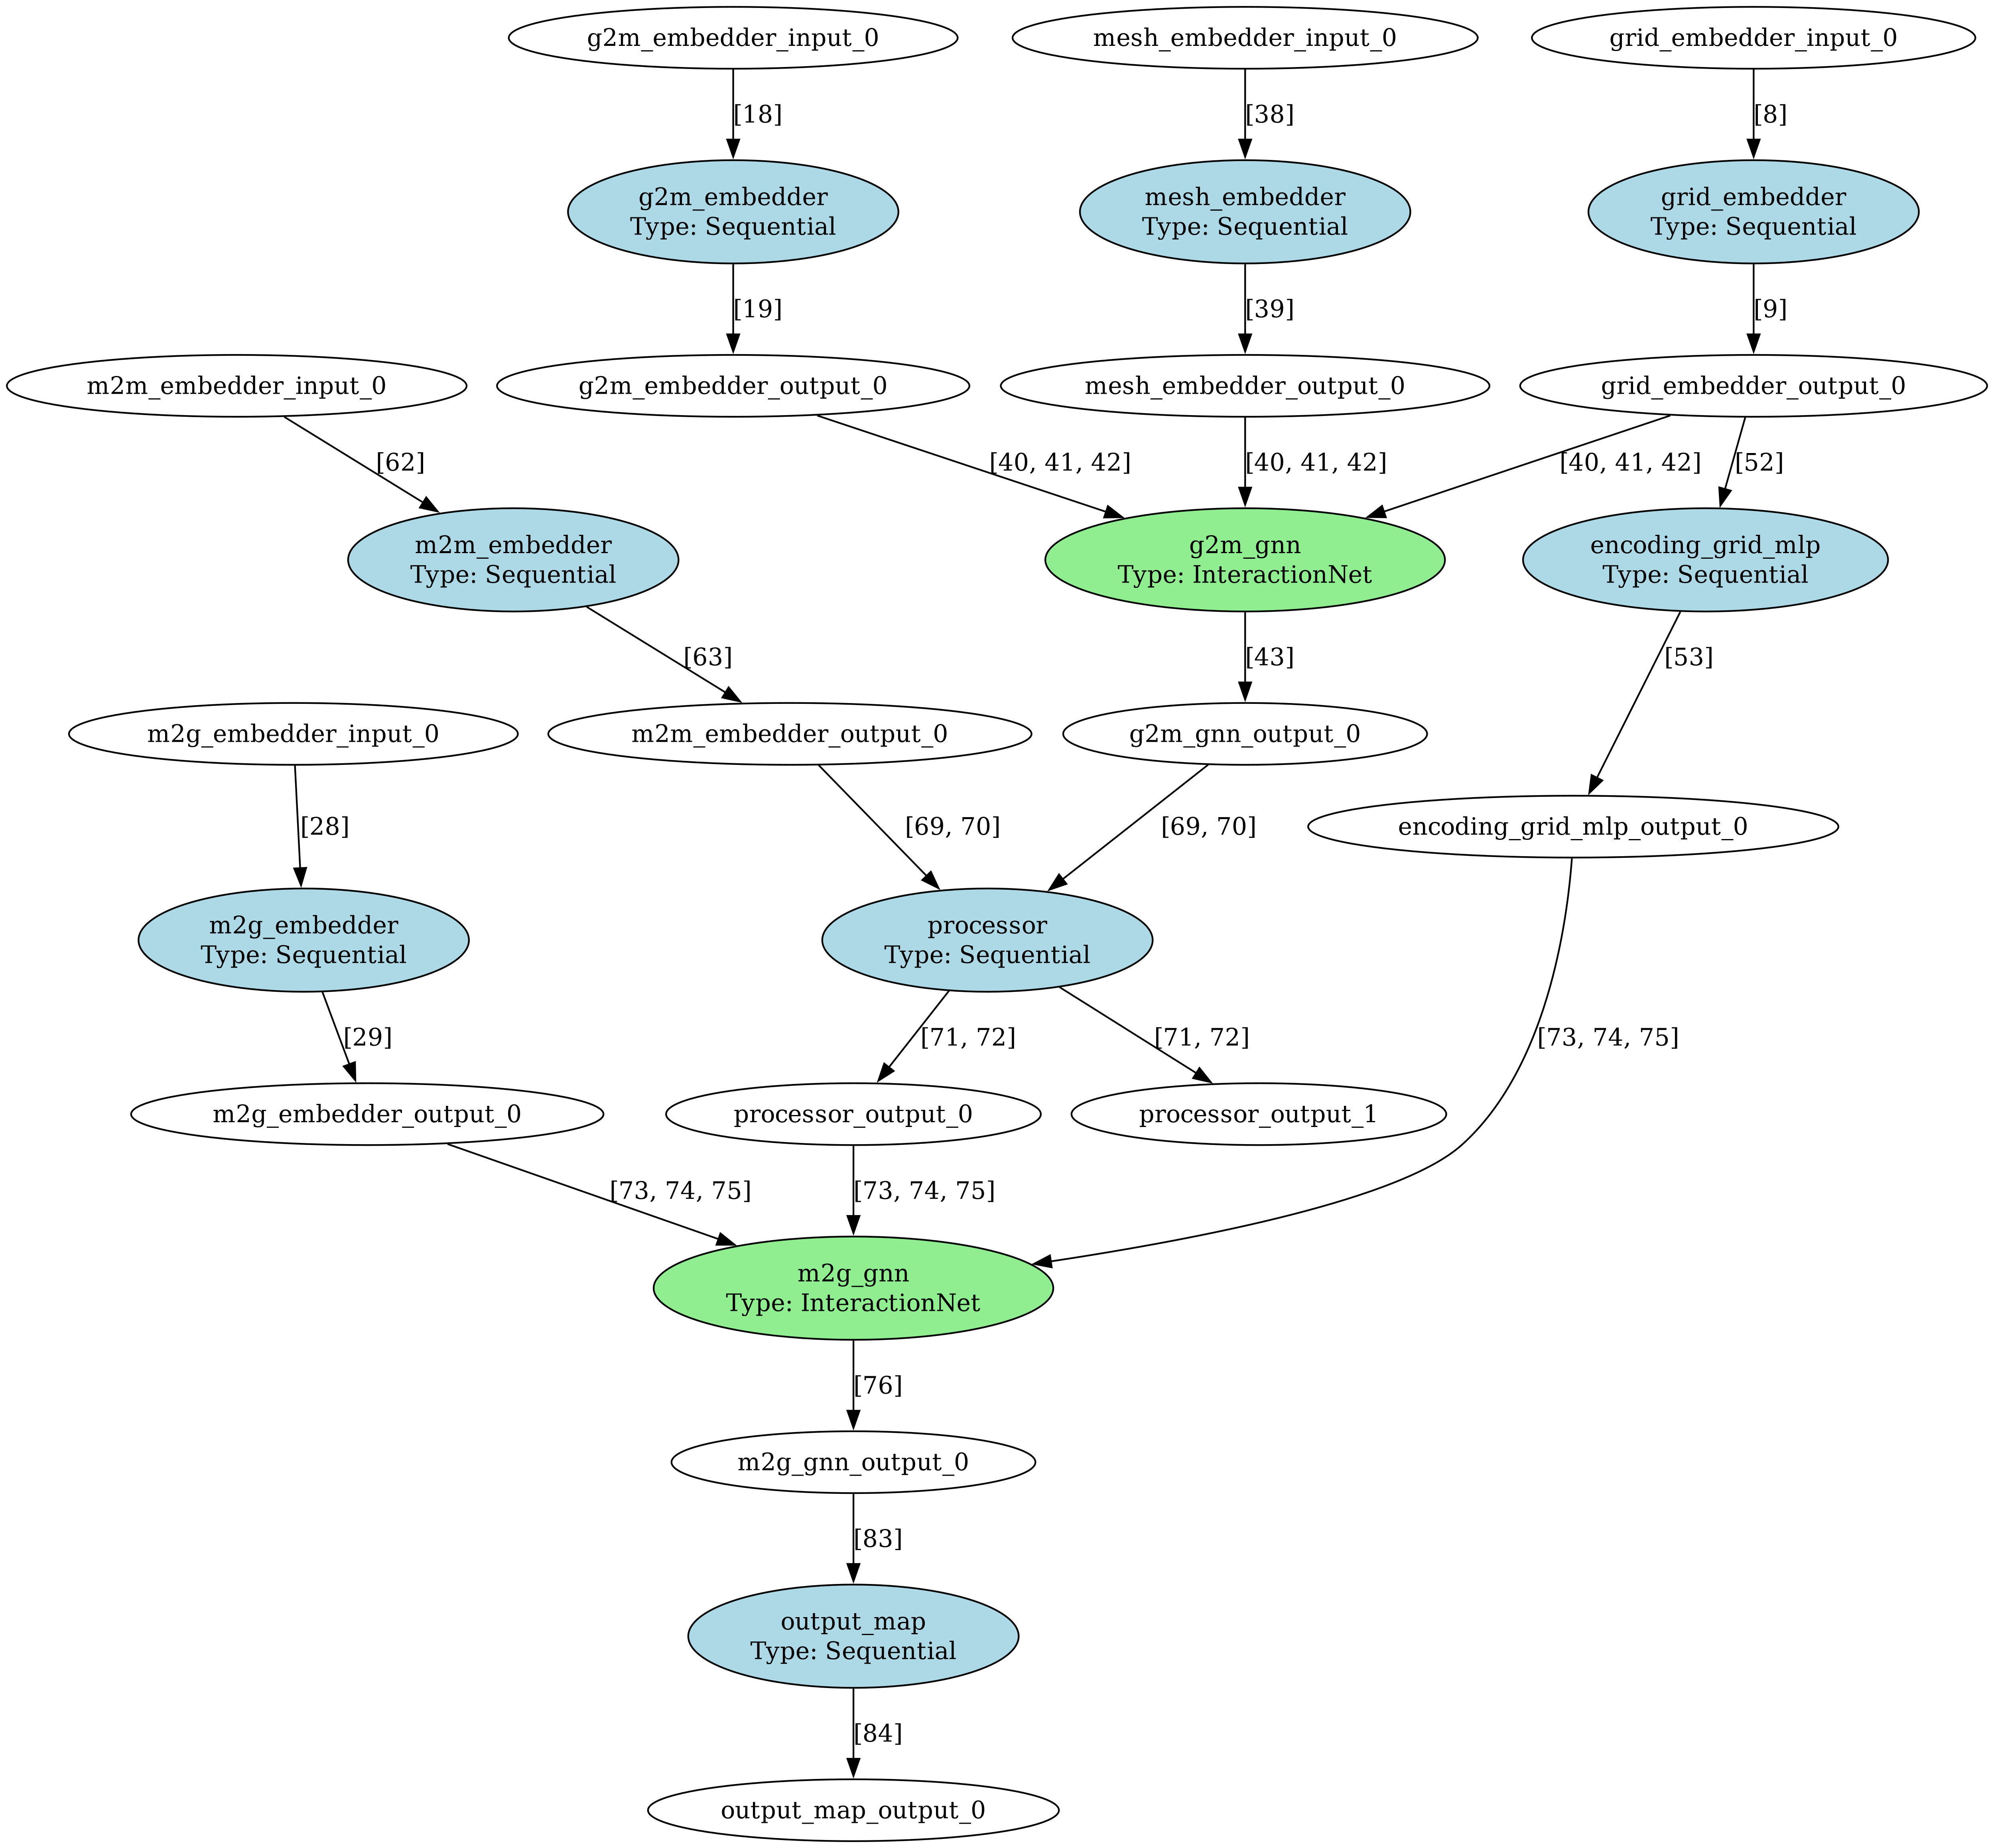

m2g features tensor([[ 0.5000,  0.3319,  0.3739],
        [ 0.3884,  0.1050,  0.3739],
        [ 0.3933, -0.1218,  0.3739],
        ...,
        [ 0.3933,  0.1218, -0.3739],
        [ 0.3884, -0.1050, -0.3739],
        [ 0.5000, -0.3319, -0.3739]])
G2M Edge Index: torch.Size([2, 100656])
G2M Edge Index: tensor([[ 6561,  6562,  6563,  ..., 70342, 70343, 70344],
        [    0,     0,     0,  ...,  6560,  6560,  6560]])
m2g features tensor([[ 0.5000,  0.3319,  0.3739],
        [ 0.3884,  0.1050,  0.3739],
        [ 0.3933, -0.1218,  0.3739],
        [ 0.5113, -0.3487,  0.3739],
        [ 0.6864, -0.5756,  0.3739],
        [ 0.8853, -0.8025,  0.3739],
        [ 1.0952, -1.0294,  0.3739],
        [ 0.3630,  0.3319,  0.1471],
        [ 0.1807,  0.1050,  0.1471],
        [ 0.1910, -0.1218,  0.1471],
        [ 0.3785, -0.3487,  0.1471],
        [ 0.5941, -0.5756,  0.1471],
        [ 0.8159, -0.8025,  0.1471],
        [ 0.3414,  0.3319, -0.0798],
        [ 0.1319,  0.1050, -0.0798],
        [ 

7it [00:00, 31068.92it/s]


name g2m_embedder


7it [00:00, 36113.32it/s]


name m2g_embedder


7it [00:00, 45308.84it/s]


name mesh_embedder


7it [00:00, 38682.65it/s]


name m2m_embedder


7it [00:00, 37982.05it/s]


name encoding_grid_mlp
input_nodes ['grid_embedder']
{'input_names': ['grid_embedder_input_0'], 'output_names': ['grid_embedder_output_0'], 'input_order': [8], 'output_order': [9], 'module_type': 'Sequential', 'num_nodes': 50, 'out_addr': 33792}
dataset.num_nodes 50


7it [00:00, 41178.30it/s]


name g2m_gnn
input_nodes ['grid_embedder', 'g2m_embedder', 'mesh_embedder']
{'input_names': ['grid_embedder_input_0'], 'output_names': ['grid_embedder_output_0'], 'input_order': [8], 'output_order': [9], 'module_type': 'Sequential', 'num_nodes': 50, 'out_addr': 33792}
dataset.num_nodes 50


3it [00:00, 24528.09it/s]
7it [00:00, 43625.75it/s]


name processor
input_nodes ['m2m_embedder', 'g2m_gnn']
{'input_names': ['m2m_embedder_input_0'], 'output_names': ['m2m_embedder_output_0'], 'input_order': [62], 'output_order': [63], 'module_type': 'Sequential', 'num_nodes': 50, 'out_addr': 18048}
dataset.num_nodes 50


7it [00:00, 40552.66it/s]


name m2g_gnn
input_nodes ['m2g_embedder', 'encoding_grid_mlp', 'processor']
{'input_names': ['m2g_embedder_input_0'], 'output_names': ['m2g_embedder_output_0'], 'input_order': [28], 'output_order': [29], 'module_type': 'Sequential', 'num_nodes': 50, 'out_addr': 18048}
dataset.num_nodes 50


7it [00:00, 42123.57it/s]
13it [00:00, 50674.68it/s]

name output_map
input_nodes ['m2g_gnn']
{'input_names': ['processor_output_0', 'encoding_grid_mlp_output_0', 'm2g_embedder_output_0'], 'output_names': ['m2g_gnn_output_0'], 'input_order': [73, 74, 75], 'output_order': [76], 'module_type': 'InteractionNet', 'num_nodes': 50, 'out_addr': 54016}
dataset.num_nodes 50



7it [00:00, 34060.47it/s]


In [3]:
model.to_device('ample',data_loader=eval_loader)